In [6]:
# Imports
import time
import math
import sys
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
from PIL import Image
from scipy import ndimage
from utils import *
from model import cnn_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(2)

In [ ]:
# train_data_orig, train_labels_orig, eval_data_orig, eval_labels_orig, classes = load_dataset()
# classes = 6
# train_labels = np.squeeze(train_labels_orig)
# train_labels_old = train_labels
# train_labels = one_hot_label(classes, train_labels_old)
# eval_labels = np.squeeze(eval_labels_orig)
# eval_labels_old = eval_labels
# eval_labels = one_hot_label(classes, eval_labels_old)
# # Flatten the training and test images
# train_data = train_data_orig.reshape(train_data_orig.shape[0], -1).T
# eval_data = eval_data_orig.reshape(eval_data_orig.shape[0], -1).T
# # Normalize image vectors
# train_data = train_data/255.
# eval_data = eval_data/255.
# features = train_data.shape[0]
# print(train_data.shape)

In [2]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
classes = 10
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
train_labels = one_hot_label(classes, train_labels)
eval_data = mnist.test.images # Returns np.array
eval_labels_old = np.asarray(mnist.test.labels, dtype=np.int32)
eval_labels = one_hot_label(classes, eval_labels_old)
features = train_data.shape[0]

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Plan
**input layer:** mx28x28x1

**conv layer1 + Relu:** mx28x28x32

**pool layer1:** mx14x14x32

**conv layer2 + Relu:** mx14x14x64

**pool layer2:** mx7x7x64

**flatten:** mx3136

**fc layer1:** mx1024

**output layer:** mx10

**softmax:** mx10

Cost after iteration 0, batch 0: 2.443976
Cost after iteration 0, batch 1: 5.496326
Cost after iteration 0, batch 2: 6.162834
Cost after iteration 0, batch 3: 2.184491
Cost after iteration 0, batch 4: 2.150827
Cost after iteration 0, batch 5: 2.206182
Cost after iteration 0, batch 6: 2.172580
Cost after iteration 0, batch 7: 2.018769
Epoch 0, Done!
Cost after iteration 1, batch 0: 1.895753
Cost after iteration 1, batch 1: 1.910416
Cost after iteration 1, batch 2: 1.849550
Cost after iteration 1, batch 3: 1.474829
Cost after iteration 1, batch 4: 1.573075
Cost after iteration 1, batch 5: 1.533980
Cost after iteration 1, batch 6: 1.629942
Cost after iteration 1, batch 7: 1.463999
Epoch 1, Done!
Cost after iteration 2, batch 0: 1.293848
Cost after iteration 2, batch 1: 1.336283
Cost after iteration 2, batch 2: 1.256044
Cost after iteration 2, batch 3: 0.954802
Cost after iteration 2, batch 4: 1.175111
Cost after iteration 2, batch 5: 1.053037
Cost after iteration 2, batch 6: 1.151389
Cost

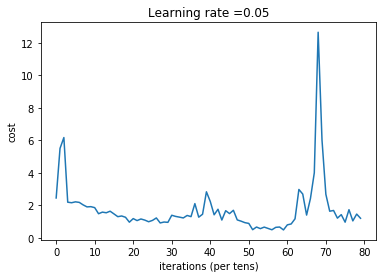

In [22]:
# Input Layer
input_layer = train_data.reshape(55000,1,28,28)
eval_data = eval_data.reshape(10000,1,28,28)
# training model
filter_dims = [(32,1,5,5),(64,32,5,5)]
layers_dims = [3136, 1024, classes] #  2-layer model
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:256], train_labels[0:256], filter_dims, layers_dims, 
                                                           truncate = 0, batch_size = 32, learning_rate = 0.05, num_iterations = 10, print_cost = True)


In [21]:
#further training on the same model 
parameters, parameters_conv, grads, conv_grads = cnn_model(input_layer[0:256], train_labels[:,0:256], layers_dims, filter_dims, 
                                                           truncate = 4, batch_size = 32, learning_rate = 0.01, num_iterations = 5, parameters = parameters, parameters_conv = parameters_conv, print_cost = True)


Cost after iteration 0, batch 0: 1.431098
Cost after iteration 0, batch 1: 1.670107
Cost after iteration 0, batch 2: 1.553089
Cost after iteration 0, batch 3: 1.409872
Cost after iteration 0, batch 4: 1.420728
Cost after iteration 0, batch 5: 1.464039
Cost after iteration 0, batch 6: 1.583235
Cost after iteration 0, batch 7: 1.477887
Epoch 0, Done!
Cost after iteration 1, batch 0: 1.424538
Cost after iteration 1, batch 1: 1.672094
Cost after iteration 1, batch 2: 1.551366
Cost after iteration 1, batch 3: 1.402603
Cost after iteration 1, batch 4: 1.416983


KeyboardInterrupt: 

In [265]:
from layers.quantize import truncate_weights
q = 2
parameters['W1'] = truncate_weights(parameters['W1'], q, weights_range = 0.08)
parameters['b1'] = truncate_weights(parameters['b1'], q, weights_range = 0.08)
parameters['W2'] = truncate_weights(parameters['W2'], q, weights_range = 0.08)
parameters['b2'] = truncate_weights(parameters['b2'], q, weights_range = 0.08)
parameters_conv['W1'] = truncate_weights(parameters_conv['W1'], q)
parameters_conv['b1'] = truncate_weights(parameters_conv['b1'], q)
parameters_conv['W3'] = truncate_weights(parameters_conv['W3'], q)
parameters_conv['b3'] = truncate_weights(parameters_conv['b3'], q)

In [8]:
eval_cnn_model(input_layer[0:256], train_labels[:,0:256], parameters, parameters_conv)

#eval_cnn_model(eval_data[0:256], eval_labels[:,0:256], parameters, parameters_conv)

Accuracy: 0.76953125


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [221]:
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
image_num = 88
predict_cnn(eval_data[image_num:image_num+1],parameters, parameters_conv)
print("actual value: " + str(eval_labels_old[image_num]))
data = mnist.test.images[image_num].reshape(28,28)
plt.imshow(data)

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['b1'].reshape(-1), 
                     parameters_conv['W3'].reshape(-1), parameters_conv['b3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(y,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [ ]:
out_m = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_m = np.mean(out_m)
variance_m = np.var(out_m)
sigma_m = math.sqrt(variance_m)
x_m = np.linspace(mu_m - 4 * sigma_m , mu_m + 4 * sigma_m , 1000)
plt.plot(x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_m)

In [ ]:
out_f = np.concatenate((conv_grads['dW1'].reshape(-1),conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu_f = np.mean(out_f)
variance_f = np.var(out_f)
sigma_f = math.sqrt(variance_f)
x_f = np.linspace(mu_f - 4 * sigma_f , mu_f + 4 * sigma_f , 1000)
plt.plot(x_f,mlab.normpdf(x_f, mu_f, sigma_f),'-',x_m,mlab.normpdf(x_m, mu_m, sigma_m),'-.', x, mlab.normpdf(x, mu, sigma), '--')
plt.show()
print("one std is",sigma_f)

In [ ]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^', t, t**4, 'r-')
plt.show()

In [ ]:
out = np.concatenate((parameters_conv['W1'].reshape(-1),parameters_conv['W3'].reshape(-1),
                      parameters_conv['b1'].reshape(-1),parameters_conv['b3'].reshape(-1),
                      conv_grads['dW1'].reshape(-1), conv_grads['dW3'].reshape(-1),
                      conv_grads['db1'].reshape(-1),conv_grads['db3'].reshape(-1)))
out = out.reshape(-1,8)
np.savetxt("parameters.csv", out, delimiter=",")

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


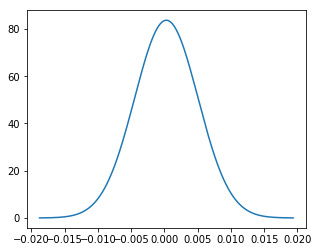

one std is 0.004766489111266608


In [179]:
out = np.concatenate((grads['dW1'].reshape(-1), grads['db1'].reshape(-1), 
                     grads['dW2'].reshape(-1), grads['db2'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

/Users/samshen/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


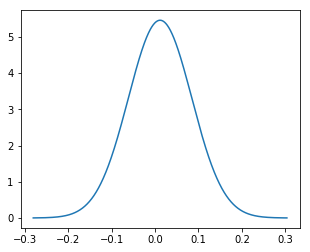

one std is 0.07304826983755976


In [181]:
out = np.concatenate((conv_grads['dW1'].reshape(-1), conv_grads['db1'].reshape(-1), 
                     conv_grads['dW3'].reshape(-1), conv_grads['db3'].reshape(-1)))
mu = np.mean(out)
variance = np.var(out)
sigma = math.sqrt(variance)
x = np.linspace(mu - 4 * sigma , mu + 4 * sigma , 1000)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print("one std is",sigma)

In [218]:
np.ceil(np.array([0.5])).astype(np.int8)

array([1], dtype=int8)